In [3]:
# Import necessary libraries
import requests
import base64
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define project parameters
project_id = "soccer-players-5fuqs"
model_version = 1
confidence = 0.5
iou_thresh = 0.5
api_key = "px2U5GD6OjD9TifyAivU"
image_url = "https://storage.googleapis.com/com-roboflow-marketing/inference/soccer.jpg"

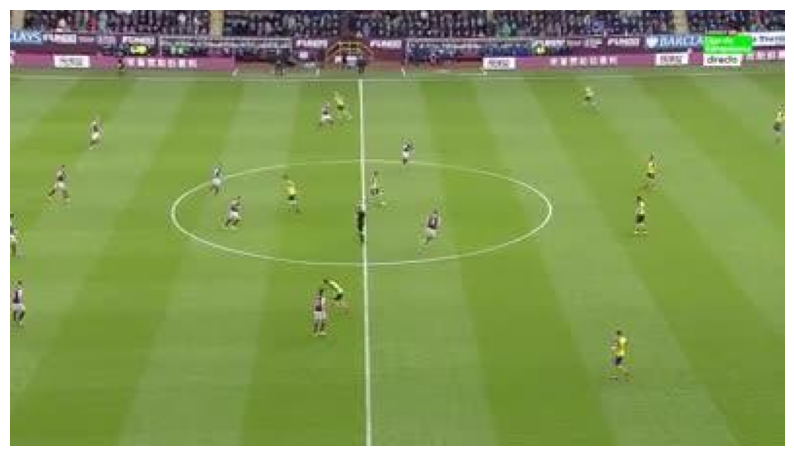

In [4]:
# Function to download and display image
def display_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return np.array(img)

# Display the image
img = display_image(image_url)

In [5]:
# Make API request
res = requests.post(
    f"https://detect.roboflow.com/{project_id}/{model_version}?api_key={api_key}&confidence={confidence}&overlap={iou_thresh}&image={image_url}",
)

# Get predictions
predictions = res.json()

# Print full predictions
print("Full predictions:")
print(predictions)

Full predictions:
{'inference_id': 'b456b012-c106-4579-ac7f-ec160490c5a0', 'time': 0.22732874099983746, 'image': {'width': 398, 'height': 224}, 'predictions': [{'x': 5.0, 'y': 152.0, 'width': 10.0, 'height': 28.0, 'confidence': 0.8946053385734558, 'class': 'player', 'class_id': 1, 'detection_id': '22ef1487-f49a-4162-994f-206cac1b79d9'}, {'x': 145.0, 'y': 95.5, 'width': 14.0, 'height': 25.0, 'confidence': 0.8900074362754822, 'class': 'player', 'class_id': 1, 'detection_id': 'b8e5db2f-e365-4bfe-b5df-17bd6f36e27f'}, {'x': 25.0, 'y': 89.5, 'width': 16.0, 'height': 25.0, 'confidence': 0.8871817588806152, 'class': 'player', 'class_id': 1, 'detection_id': '17500966-34a8-44ee-9acc-e1a3a99791d6'}, {'x': 313.0, 'y': 178.0, 'width': 16.0, 'height': 32.0, 'confidence': 0.8780373930931091, 'class': 'player', 'class_id': 1, 'detection_id': '5311a656-a31b-42e2-97c6-e519e8c393c6'}, {'x': 324.0, 'y': 106.5, 'width': 12.0, 'height': 25.0, 'confidence': 0.8769769072532654, 'class': 'player', 'class_id': 

In [6]:
# Display important fields separately
print("\nImportant fields:")
for pred in predictions['predictions']:
    print(f"Class: {pred['class']}")
    print(f"Confidence: {pred['confidence']:.2f}")
    print(f"Bounding Box: x={pred['x']:.2f}, y={pred['y']:.2f}, w={pred['width']:.2f}, h={pred['height']:.2f}")
    print("---")


Important fields:
Class: player
Confidence: 0.89
Bounding Box: x=5.00, y=152.00, w=10.00, h=28.00
---
Class: player
Confidence: 0.89
Bounding Box: x=145.00, y=95.50, w=14.00, h=25.00
---
Class: player
Confidence: 0.89
Bounding Box: x=25.00, y=89.50, w=16.00, h=25.00
---
Class: player
Confidence: 0.88
Bounding Box: x=313.00, y=178.00, w=16.00, h=32.00
---
Class: player
Confidence: 0.88
Bounding Box: x=324.00, y=106.50, w=12.00, h=25.00
---
Class: player
Confidence: 0.87
Bounding Box: x=44.00, y=63.50, w=12.00, h=21.00
---
Class: player
Confidence: 0.86
Bounding Box: x=114.00, y=105.00, w=14.00, h=22.00
---
Class: player
Confidence: 0.86
Bounding Box: x=216.00, y=113.00, w=14.00, h=26.00
---
Class: player
Confidence: 0.85
Bounding Box: x=329.50, y=84.50, w=13.00, h=23.00
---
Class: player
Confidence: 0.84
Bounding Box: x=106.00, y=88.00, w=12.00, h=20.00
---
Class: player
Confidence: 0.84
Bounding Box: x=159.00, y=156.00, w=14.00, h=28.00
---
Class: player
Confidence: 0.84
Bounding Box:

In [7]:
# Function to draw bounding boxes
def draw_boxes(image, predictions):
    for pred in predictions['predictions']:
        x, y, w, h = int(pred['x']), int(pred['y']), int(pred['width']), int(pred['height'])
        cv2.rectangle(image, (x-w//2, y-h//2), (x+w//2, y+h//2), (0, 255, 0), 2)
        cv2.putText(image, f"{pred['class']} {pred['confidence']:.2f}", (x-w//2, y-h//2-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Draw bounding boxes on the image
img_with_boxes = draw_boxes(img.copy(), predictions)

In [20]:
# Save the annotated image using OpenCV
cv2.imwrite('annotated_soccer_players.jpg', cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR))

print("Annotated image saved as 'annotated_soccer_players.jpg'")

Annotated image saved as 'annotated_soccer_players.jpg'


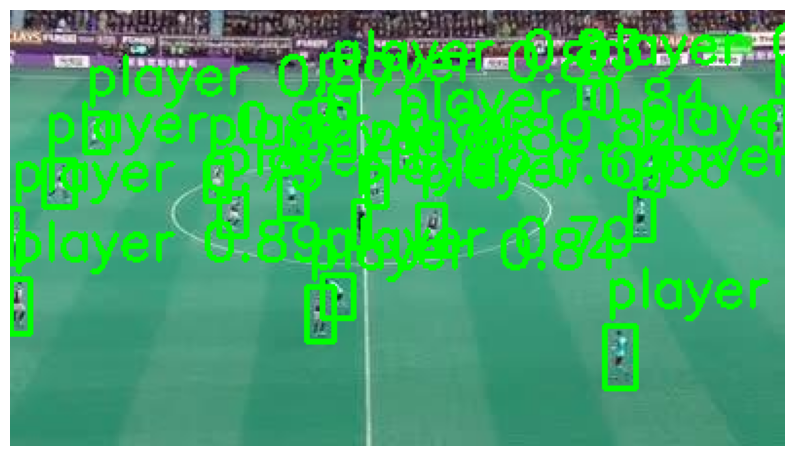

In [8]:
# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()